### Project Name: Uber Price Modeling <br> Project Type: Data Analysis <br> DSC 478 – Programming Machine Learning Applications <br> Group Members: Emmanuel Akanbi, Edward Guen-Murray, Nick Kutella


In [52]:
# Import Libraries
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import haversine as hs
from haversine import Unit
import seaborn as sns


# Set working directory

In [53]:
cd d:\\0r2768\\PERSONAL\\TUITION\\DSC_478\\Final_Project

d:\0r2768\PERSONAL\TUITION\DSC_478\Final_Project


### All members of the group contributed to data cleaning, feature creation, and data exploration.
#### Load Uber Dataset

In [54]:
# Load dataset
uber_df = pd.read_csv("Data/uber.csv")
uber_df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


#### Data Cleaning and Preprocessing

In [55]:
# Drop useless columns
uber_df.drop(columns=['Unnamed: 0', 'key'], inplace=True)

In [56]:
row_count = uber_df.shape[0]
print("The original uber trips data set includes {} rows".format(row_count))

The original uber trips data set includes 200000 rows


In [57]:
# Examine 'passenger_count' feature
print("Original 'passenger_count' Statistics Summary\n", uber_df['passenger_count'].describe(), '\n')

# Remove unreasonably high passenger counts (i.e. above 10) and passenger counts below 1
uber_df = uber_df[(uber_df['passenger_count'] <= 10) & (uber_df['passenger_count'] > 0)]
print("Remove unreasonably high passenger counts (i.e. above 10) and passenger counts below 1")
print("{} rows were removed. The remaining data set includes {} rows.\n".format((row_count - uber_df.shape[0]), uber_df.shape[0]))
row_count = uber_df.shape[0]
print("Revised 'passenger_count' Statistics Summary\n", uber_df['passenger_count'].describe(), '\n')

Original 'passenger_count' Statistics Summary
 count    200000.000000
mean          1.684535
std           1.385997
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         208.000000
Name: passenger_count, dtype: float64 

Remove unreasonably high passenger counts (i.e. above 10) and passenger counts below 1
710 rows were removed. The remaining data set includes 199290 rows.

Revised 'passenger_count' Statistics Summary
 count    199290.000000
mean          1.689493
std           1.305420
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           6.000000
Name: passenger_count, dtype: float64 



In [58]:
# Examine 'fare_amount' feature
print("Original 'fare_amount' Statistics Summary\n", uber_df['fare_amount'].describe(), '\n')

# Remove negative fare_amounts
uber_df = uber_df[uber_df['fare_amount'] > 0]
print("Remove negative fares")
print("{} rows were removed. The remaining data set includes {} rows.\n".format((row_count - uber_df.shape[0]), uber_df.shape[0]))
row_count = uber_df.shape[0]
print("Revised 'passenger_count' Statistics Summary\n", uber_df['fare_amount'].describe(), '\n')
#np.log10(uber_df['fare_amount']).hist(bins=50)

Original 'fare_amount' Statistics Summary
 count    199290.000000
mean         11.366713
std           9.910588
min         -52.000000
25%           6.000000
50%           8.500000
75%          12.500000
max         499.000000
Name: fare_amount, dtype: float64 

Remove negative fares
22 rows were removed. The remaining data set includes 199268 rows.

Revised 'passenger_count' Statistics Summary
 count    199268.000000
mean         11.369418
std           9.905877
min           0.010000
25%           6.000000
50%           8.500000
75%          12.500000
max         499.000000
Name: fare_amount, dtype: float64 



In [59]:
# Examine 'fare_amount' feature
print("Original pickup and dropoff Statistics Summary\n", uber_df[['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']].describe(), '\n')

# Remove data with invalid location information (i.e. with invalid pickup or dropoff latitude or longitude)
uber_df = uber_df[(uber_df['pickup_latitude'] > -90) & (uber_df['pickup_latitude'] < 90)]
uber_df = uber_df[(uber_df['dropoff_latitude'] > -90) & (uber_df['dropoff_latitude'] < 90)]
uber_df = uber_df[(uber_df['pickup_longitude'] > -180) & (uber_df['pickup_longitude'] < 180)]
uber_df = uber_df[(uber_df['dropoff_longitude'] > -180) & (uber_df['dropoff_longitude'] < 180)]

print("Invalid latitude and longitude values were removed")
print("{} rows were removed. The remaining data set includes {} rows.\n".format((row_count - uber_df.shape[0]), uber_df.shape[0]))
row_count = uber_df.shape[0]
print("Revised pickup and dropoff Statistics Summary\n", uber_df[['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']].describe(), '\n')

Original pickup and dropoff Statistics Summary
        pickup_latitude  pickup_longitude  dropoff_latitude  dropoff_longitude
count    199268.000000     199268.000000     199268.000000      199268.000000
mean         39.937182        -72.530113         39.925350         -72.528142
std           7.723680         11.434234          6.794163          13.119047
min         -74.015515      -1340.648410       -881.985513       -3356.666300
25%          40.734796        -73.992065         40.733828         -73.991410
50%          40.752584        -73.981825         40.753041         -73.980095
75%          40.767157        -73.967162         40.767995         -73.963664
max        1644.421482         57.418457        872.697628        1153.572603 

Invalid latitude and longitude values were removed
12 rows were removed. The remaining data set includes 199256 rows.

Revised pickup and dropoff Statistics Summary
        pickup_latitude  pickup_longitude  dropoff_latitude  dropoff_longitude
coun

In [60]:
# Convert datetime column types
uber_df['pickup_datetime'] = pd.to_datetime(uber_df['pickup_datetime'])

In [61]:
# Breakup datetime to create separate variables
uber_df['day_of_week'] = uber_df['pickup_datetime'].dt.day_of_week
uber_df['hour'] = uber_df['pickup_datetime'].dt.hour
uber_df['month'] = uber_df['pickup_datetime'].dt.month
uber_df['year'] = uber_df['pickup_datetime'].dt.year

# Drop original 'pickup_datetime' variable
uber_df.drop(columns='pickup_datetime', inplace=True)

#### Feature Creation

In [62]:
# Create Manhattan Trip Distance variables
uber_df['manhattan_dist'] = np.abs(uber_df['dropoff_latitude'] - uber_df['pickup_latitude']) + np.abs(uber_df['dropoff_longitude'] - uber_df['pickup_longitude'])
uber_df['manhattan_dist'].describe()

count    199256.000000
mean          0.266234
std           4.956002
min           0.000000
25%           0.015866
50%           0.027704
75%           0.050348
max         116.137027
Name: manhattan_dist, dtype: float64

In [63]:
def distance (initial_latitude,initial_longitude,final_latitude,final_longitude):
    loc1 = (initial_latitude,initial_longitude)
    loc2 = (final_latitude,final_longitude)
    dist = hs.haversine(loc1,loc2, unit=Unit.MILES)
    return dist

In [64]:
location = list(zip(uber_df.pickup_latitude, uber_df.pickup_longitude))
location = np.array(location)

#calculate distance traveled
uber_df["haversine_distance"] = uber_df.apply(lambda x: distance(x["pickup_latitude"], x["pickup_longitude"], 
x["dropoff_latitude"],x["dropoff_longitude"]), axis =1)

In [65]:
# Examine 'haversine_distance' feature
print("Original 'haversine_distance' Statistics Summary\n", uber_df['haversine_distance'].describe(), '\n')

# Remove trips over 100 miles and less that 0.1 mile
uber_df = uber_df[(uber_df['haversine_distance'] < 100) & (uber_df['haversine_distance'] > 0.1)]

print("Very long trips and very short trips were removed")
print("{} rows were removed. The remaining data set includes {} rows.\n".format((row_count - uber_df.shape[0]), uber_df.shape[0]))
row_count = uber_df.shape[0]
print("Revised pickup and dropoff Statistics Summary\n", uber_df['haversine_distance'].describe(), '\n')


Original 'haversine_distance' Statistics Summary
 count    199256.000000
mean         12.626799
std         234.162817
min           0.000000
25%           0.755228
50%           1.318531
75%           2.408355
max        5457.447714
Name: haversine_distance, dtype: float64 

Very long trips and very short trips were removed
7556 rows were removed. The remaining data set includes 191700 rows.

Revised pickup and dropoff Statistics Summary
 count    191700.000000
mean          2.116292
std           2.481662
min           0.100190
25%           0.807107
50%           1.364937
75%           2.463773
max          81.115398
Name: haversine_distance, dtype: float64 



In [66]:
uber_df["fare_rate"] = uber_df["fare_amount"] / uber_df["haversine_distance"]

In [67]:
uber_df["log_fare_rate"] = np.log(uber_df["fare_rate"])

#### Data Explorations

In [68]:
uber_df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day_of_week,hour,month,year,manhattan_dist,haversine_distance,fare_rate,log_fare_rate
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,3,19,5,2015,0.015442,1.045970,7.170380,1.969959
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,4,20,7,2009,0.022455,1.527078,5.042311,1.617864
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,0,21,8,2009,0.074355,3.129464,4.122112,1.416366
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,4,8,6,2009,0.023313,1.032524,5.133054,1.635701
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,3,17,8,2014,0.065221,2.780920,5.753493,1.749807


[Text(0.5, 1.0, 'Density Plots of Fare Rate')]

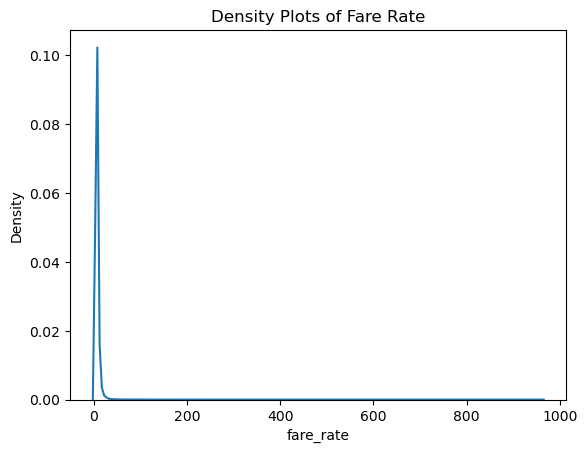

In [69]:
# Create Density plot of the fare rate variable
sns.kdeplot(x=uber_df.fare_rate).set(title='Density Plots of Fare Rate')


<AxesSubplot:xlabel='log_fare_rate', ylabel='Density'>

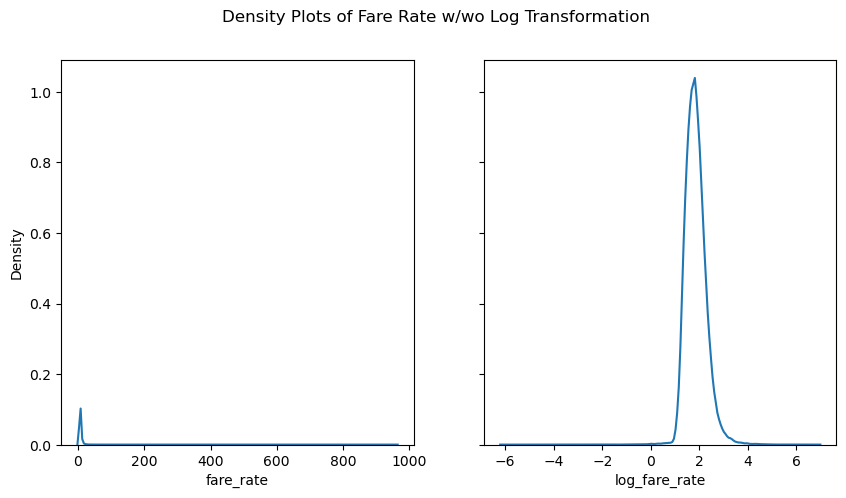

In [70]:
# Create Density plot of the fare rate variable with log transformation
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(10,5))
fig.suptitle('Density Plots of Fare Rate w/wo Log Transformation')

sns.kdeplot(ax=axes[0], x=uber_df.fare_rate)
sns.kdeplot(ax=axes[1], x=uber_df.log_fare_rate)

<AxesSubplot:title={'center':'Number of Trips by Hour of Day'}>

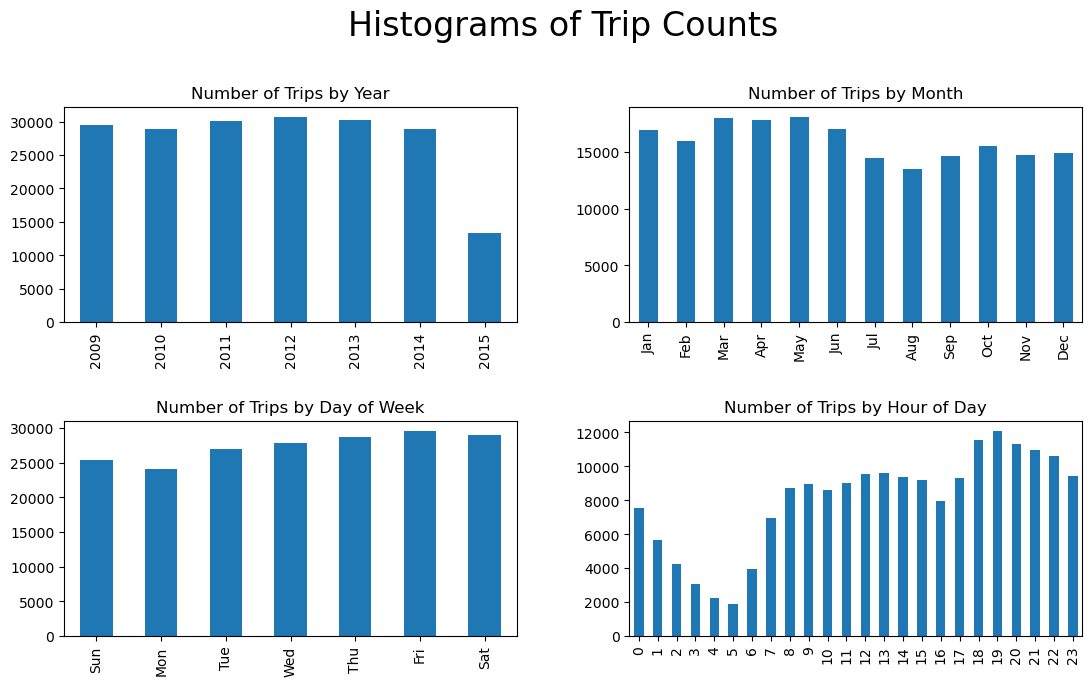

In [71]:
import calendar

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
fig.suptitle('Histograms of Trip Counts', fontsize=24, y=0.9)
fig.tight_layout(pad=5.0)

# Trips by Year
uber_df['year'].value_counts().sort_index().plot(kind='bar', ax=axes[0,0] , title='Number of Trips by Year')

# Trips by Month
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
uber_df_sorted_bymonth = uber_df['month'].astype(int).apply(lambda x: calendar.month_abbr[x]).value_counts().reset_index()
uber_df_sorted_bymonth.set_index('index', inplace=True)
uber_df_sorted_bymonth = uber_df_sorted_bymonth.reindex(index=months)
uber_df_sorted_bymonth.plot(kind='bar', ax=axes[0,1], title='Number of Trips by Month')
axes[0,1].get_legend().remove()
axes[0,1].set_xlabel('')

# Trips by day of the week
days = ["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"]
uber_df_sorted_byday = uber_df['day_of_week'].astype(int).apply(lambda x: calendar.day_abbr[x]).value_counts().reset_index()
uber_df_sorted_byday.set_index('index', inplace=True)
#print(uber_df_sorted_byday)
uber_df_sorted_byday = uber_df_sorted_byday.reindex(index=days)
uber_df_sorted_byday.plot(kind='bar', ax=axes[1,0], title='Number of Trips by Day of Week')
axes[1,0].get_legend().remove()
axes[1,0].set_xlabel('')


# Trips by the hour
uber_df['hour'].value_counts().sort_index().plot(kind='bar', ax=axes[1,1], title='Number of Trips by Hour of Day')

<AxesSubplot:title={'center':'By Hour'}, xlabel='hour'>

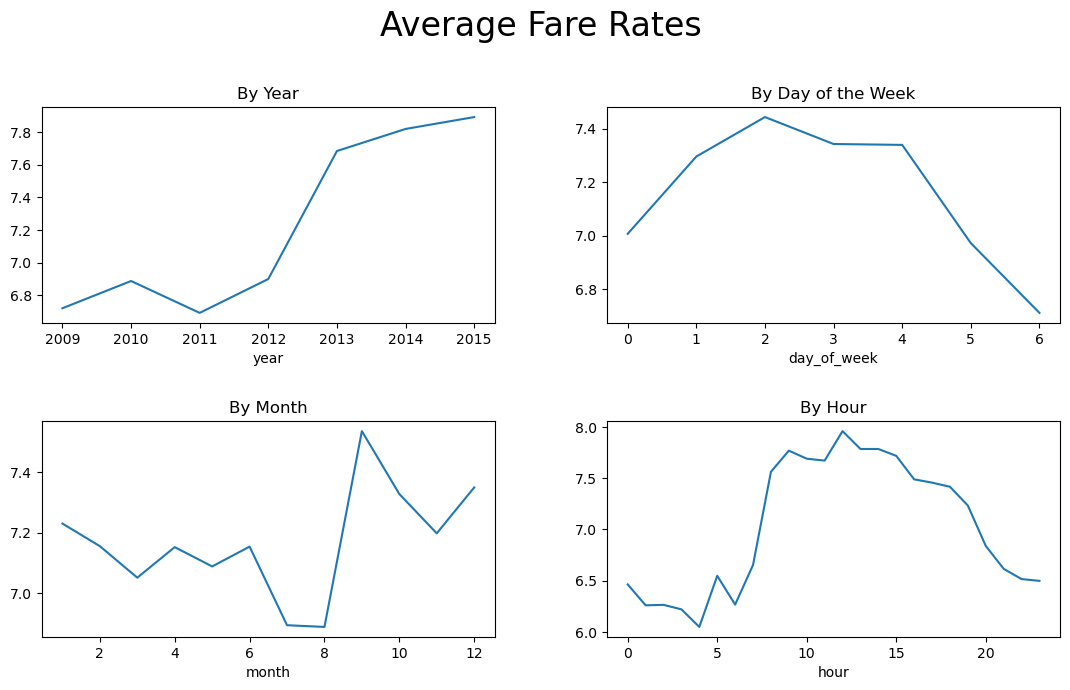

In [72]:
# Plot mean price by day
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
fig.suptitle('Average Fare Rates', fontsize=24, y=0.9)
fig.tight_layout(pad=5.0)

# Trips by Year
uber_df.groupby('year')['fare_rate'].mean().plot(ax=axes[0,0], title='By Year')

# Trips by Month
uber_df.groupby('month')['fare_rate'].mean().plot(ax=axes[1,0], title='By Month')


# Trips by day of the week
uber_df.groupby('day_of_week')['fare_rate'].mean().plot(ax=axes[0,1], title='By Day of the Week')

# Trips by hour
uber_df.groupby('hour')['fare_rate'].mean().plot(ax=axes[1,1], title='By Hour')



### Plot trips by location

In [73]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame


world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
geometry_pickup = [Point(xy) for xy in zip(uber_df.pickup_longitude, uber_df.pickup_latitude)]
geometry_dropoff = [Point(xy) for xy in zip(uber_df.dropoff_longitude, uber_df.dropoff_latitude)]
gdf_pickup = GeoDataFrame(uber_df, geometry=geometry_pickup)
gdf_dropoff = GeoDataFrame(uber_df, geometry=geometry_dropoff)

# Remove data with invalid location information
uber_df_usa = uber_df.copy()
uber_df_usa = uber_df_usa[(uber_df_usa['pickup_latitude'] > 20) & (uber_df_usa['pickup_latitude'] < 55)]
uber_df_usa = uber_df_usa[(uber_df_usa['dropoff_latitude'] > 20) & (uber_df_usa['dropoff_latitude'] < 55)]
uber_df_usa = uber_df_usa[(uber_df_usa['pickup_longitude'] > -125) & (uber_df_usa['pickup_longitude'] < -50)]
uber_df_usa = uber_df_usa[(uber_df_usa['dropoff_longitude'] > -125) & (uber_df_usa['dropoff_longitude'] < -50)]

states = gpd.read_file('Data/usa-states-census-2014.shp')
geometry_pickup_usa = [Point(xy) for xy in zip(uber_df_usa.pickup_longitude, uber_df_usa.pickup_latitude)]
geometry_dropoff_usa = [Point(xy) for xy in zip(uber_df_usa.dropoff_longitude, uber_df_usa.dropoff_latitude)]
gdf_pickup_usa = GeoDataFrame(uber_df_usa, geometry=geometry_pickup_usa)   
gdf_dropoff_usa = GeoDataFrame(uber_df_usa, geometry=geometry_dropoff_usa)  

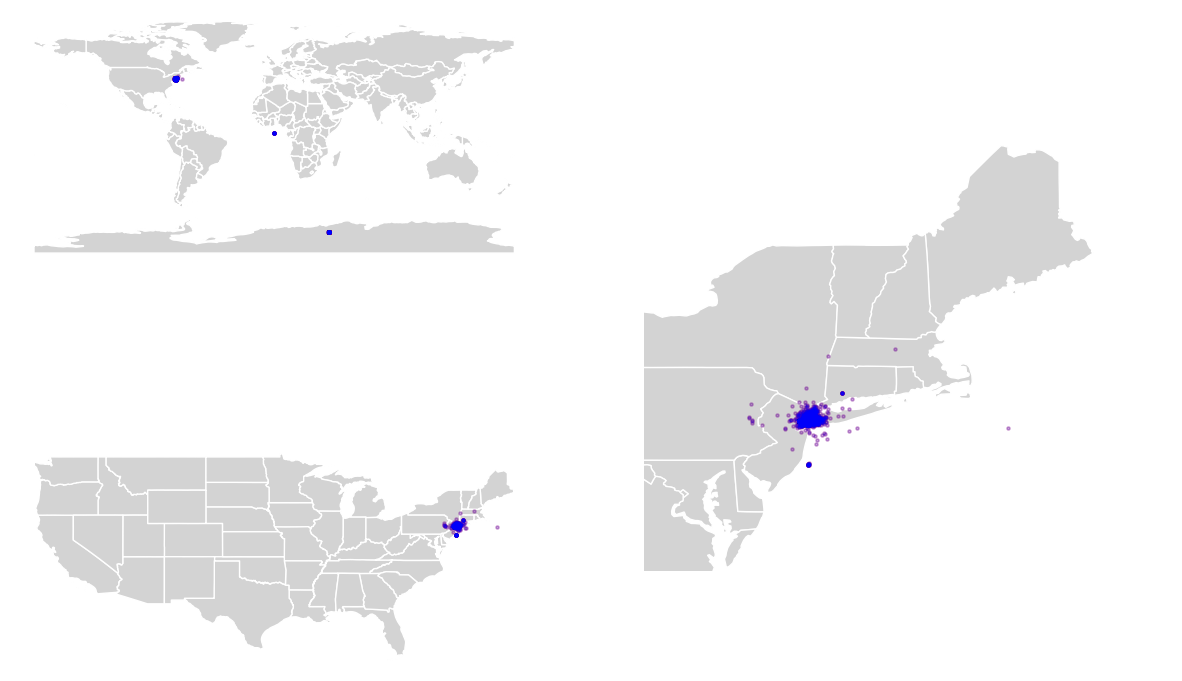

In [74]:
fig = plt.figure(figsize=(15,10))
ax11 = plt.subplot2grid((2,2), (0,0))
ax12 = plt.subplot2grid((2,2), (1,0))
ax2 = plt.subplot2grid((2,2), (0,1), rowspan=2)

ax11.set_aspect('equal')
ax12.set_aspect('equal')
ax2.set_aspect('equal')
ax11.set_axis_off()
ax12.set_axis_off()
ax2.set_axis_off()

world.plot(ax=ax11, linewidth=1, edgecolor='white', color='lightgrey')
gdf_pickup.plot(ax=ax11, marker='o', color='red', markersize=5, alpha=0.2)
gdf_dropoff.plot(ax=ax11, marker='o', color='blue', markersize=5, alpha=0.2)

states.plot(ax=ax12, linewidth=1, edgecolor='white', color='lightgrey')
gdf_pickup_usa.plot(ax=ax12, marker='o', color='red', markersize=5, alpha=0.2)
gdf_dropoff_usa.plot(ax=ax12, marker='o', color='blue', markersize=5, alpha=0.2)

states.plot(ax=ax2, linewidth=1, edgecolor='white', color='lightgrey')
gdf_pickup_usa.plot(ax=ax2, marker='o', color='red', markersize=5, alpha=0.2)
gdf_dropoff_usa.plot(ax=ax2, marker='o', color='blue', markersize=5, alpha=0.2)
ax2.set(xlim=(-78, -65), ylim=(37, 48))

plt.show()

In [75]:
# Export clean data
uber_df_usa.describe()
uber_df_usa.to_csv('Data/uber_usa.csv', sep=',')

#### Data Analysis
#### Each memeber of the group independently performed data analysis on the cleaned data set using a different machine learning technique.
- Decision Tree (See notebook Uber_Price_Modeling_Decision_Tree_Notebook.ipynb)
- LDA and Logistic Regression (See notebook #####.ipynb)
- Clustering and Logistic Regression (See notebook #####.ipynb)